/var/folders/xx/809jr4w13lqgcx62t5s5tm380000gn/T/ipykernel_28155/3683967219.py:19: RuntimeWarning: divide by zero encountered in divide
  plt.plot(bin_edges[1:], 1/counts,'r.-')


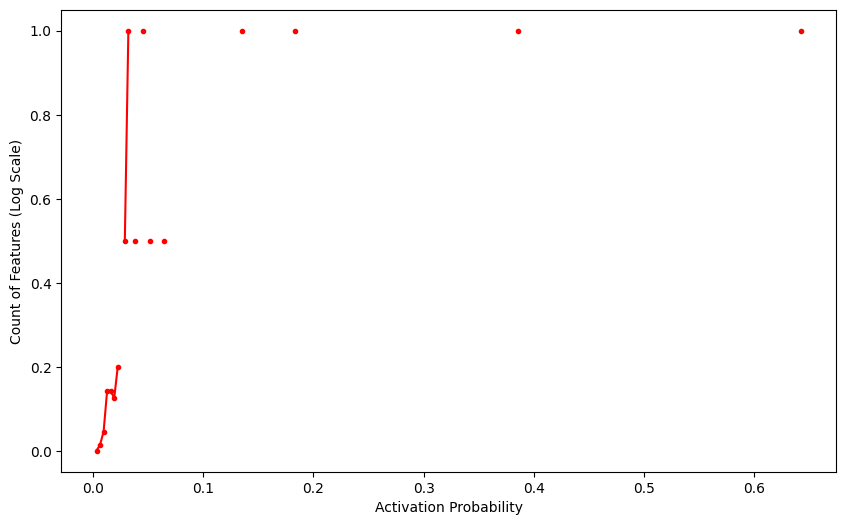

[4735   69   22    7    7    8    5    0    2    1    0    2    0    1
    0    2    0    0    0    2    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    1
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    1    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    1    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the saved data
data = torch.load("feature_sparsity_data.pt")
frequencies = data["frequencies"]
THRESHOLD = data["threshold"]

# Filter out dead features
active_freqs = frequencies[frequencies > 0].cpu().numpy()

counts, bin_edges = np.histogram(active_freqs, bins=200)

plt.figure(figsize=(10, 6))
#plt.hist(active_freqs, bins=200, log=True, color='skyblue', edgecolor='black')
#plt.title(f"Feature Activation Frequency Distribution (Threshold > {THRESHOLD})")

plt.plot(bin_edges[1:], 1/counts,'r.-')
plt.xlabel("Activation Probability")
plt.ylabel("Count of Features (Log Scale)")
#plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

print(counts)

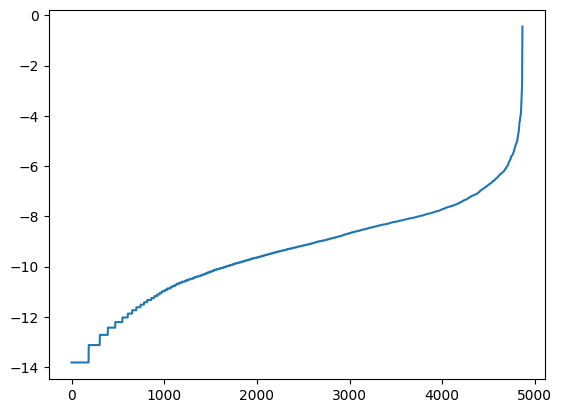

In [12]:
plt.figure()
plt.plot(np.log(np.sort(active_freqs)))
plt.show()

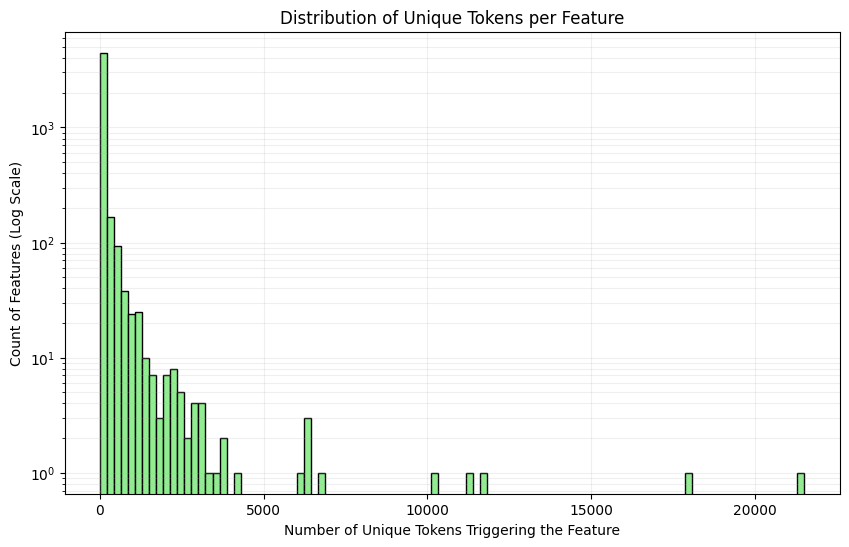

Max unique tokens for a single feature: 21507
Average unique tokens (for active features): 103.56


In [14]:
# Compute number of unique tokens for each feature.

import torch
import matplotlib.pyplot as plt

# 1. Load the data
data = torch.load("feature_sparsity_data.pt")
feature_token_counts = data["feature_token_counts"] # This is a list of Counter objects

# 2. Count unique tokens for each feature
# len(counter) gives the number of unique keys (distinct tokens)
unique_counts = [len(counter) for counter in feature_token_counts]

# 3. Filter out dead features (those with 0 activations)
active_unique_counts = [c for c in unique_counts if c > 0]

counts, bin_edges = np.histogram(active_unique_counts, bins=50)

# 4. Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(active_unique_counts, bins=100, log=True, color='lightgreen', edgecolor='black')
plt.title("Distribution of Unique Tokens per Feature")
plt.xlabel("Number of Unique Tokens Triggering the Feature")
plt.ylabel("Count of Features (Log Scale)")
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

# Optional: Print some stats
print(f"Max unique tokens for a single feature: {max(unique_counts)}")
print(f"Average unique tokens (for active features): {sum(active_unique_counts)/len(active_unique_counts):.2f}")

/var/folders/xx/809jr4w13lqgcx62t5s5tm380000gn/T/ipykernel_28155/321279491.py:18: RuntimeWarning: divide by zero encountered in log
  plt.plot(bin_edges[1:], np.log(counts),'ro')


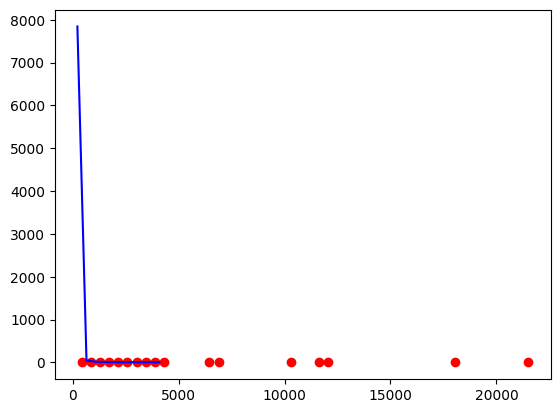

In [ ]:
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 2. Filter non-zero bins for log fitting
valid_mask = (counts > 0) & (bin_centers < 5000)
x_data = bin_centers[valid_mask]
y_data = counts[valid_mask]

# 3. Fit Power Law: log(y) = alpha * log(x) + C
# This fits the relationship y = exp(C) * x^alpha
inv_x=1/x_data
log_y = np.log(y_data)

# Fit linear model in log-log space
slope, intercept = np.polyfit(inv_x, log_y, 1)
fitted_y = intercept+inv_x*slope

plt.figure()
plt.plot(bin_edges[1:], np.log(counts),'ro')
plt.plot(x_data, fitted_y,'b-')
plt.show()

The result suggests the following formula:
$$\rho(P) = Ce^{-\mu/P}$$

$\rho(P)$ is the number of features active at a given activation probability $P$.
